In [56]:

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt




In [57]:
#Dataset link
link ="https://api.covidtracking.com/v1/states/daily.csv"
x =requests.get(link).content



In [58]:
#Reading Datset using pandas dataframe
df = pd.read_csv(io.StringIO(x.decode('utf-8')))
df


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,NaN
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,NaN
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,NaN
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,NaN,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,NaN


In [59]:
#Finding the rows and columns of the data
df.shape

(20780, 56)

In [60]:
#Conversion of date to YY-MM-DD or ISO format
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [61]:
#Description of the dataset
df.describe()

,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,2.059200e+04,9271.000000,1.327600e+04,2139.000000,2.061400e+04,17339.000000,12404.000000,11636.000000,3792.000000,9126.000000,...,2.078000e+04,0.0,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0,0.0
mean,1.651560e+05,21729.123719,8.491112e+05,1659.086957,2.186925e+06,1190.576965,9246.375040,359.621176,1932.719146,151.589305,...,7.061449e+05,NaN,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0,NaN
std,3.267852e+05,45471.459778,1.344933e+06,4670.073945,4.436513e+06,2060.041207,12615.338779,594.831150,1953.258233,207.755157,...,1.300000e+06,NaN,60.160915,208.243368,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,0.000000,...,0.000000e+00,NaN,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0,NaN
25%,5.753750e+03,773.500000,5.461850e+04,43.000000,1.040498e+05,166.500000,977.750000,60.000000,499.250000,29.000000,...,2.565875e+04,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
50%,4.606450e+04,4491.000000,3.059720e+05,212.000000,6.552670e+05,531.000000,4447.000000,172.000000,1294.000000,86.000000,...,1.935810e+05,NaN,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN
75%,1.779580e+05,19553.000000,1.057524e+06,1294.500000,2.264766e+06,1279.000000,12227.750000,380.000000,2449.500000,185.000000,...,7.737408e+05,NaN,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0,NaN
max,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,2425.000000,...,1.124825e+07,NaN,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,NaN


In [62]:
#Dropping the column dateChecked as it will not be used in analysis
df.drop(['dateChecked'],axis=1,inplace=True)

In [63]:
df = df.drop(["dataQualityGrade","commercialScore","negativeRegularScore","negativeScore","positiveScore","score","grade"], axis = 1)

In [64]:
#Converting state names to string format
df['state']=df['state'].apply(str)

In [65]:
# Data types of the columns of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 48 columns):
date                           20780 non-null datetime64[ns]
state                          20780 non-null object
positive                       20592 non-null float64
probableCases                  9271 non-null float64
negative                       13276 non-null float64
pending                        2139 non-null float64
totalTestResultsSource         20780 non-null object
totalTestResults               20614 non-null float64
hospitalizedCurrently          17339 non-null float64
hospitalizedCumulative         12404 non-null float64
inIcuCurrently                 11636 non-null float64
inIcuCumulative                3792 non-null float64
onVentilatorCurrently          9126 non-null float64
onVentilatorCumulative         1293 non-null float64
recovered                      12003 non-null float64
lastUpdateEt                   20164 non-null object
dateModified                

In [66]:
# Removing na values
df.fillna(value=0, inplace=True)

In [67]:
# Cleaned Dataset
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash
0,2021-03-07,AK,56886.0,0.0,0.0,0.0,totalTestsViral,1731628.0,33.0,1293.0,...,0.0,2,0,0,56886,0,56886,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164
1,2021-03-07,AL,499819.0,107742.0,1931711.0,0.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,0.0,1,408,2087,2431530,2347,2431530,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e
2,2021-03-07,AR,324818.0,69092.0,2480716.0,0.0,totalTestsViral,2736442.0,335.0,14926.0,...,0.0,5,165,3267,2805534,3380,2805534,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae
3,2021-03-07,AS,0.0,0.0,2140.0,0.0,totalTestsViral,2140.0,0.0,0.0,...,0.0,60,0,0,2140,0,2140,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,0.0,totalTestsViral,7908105.0,963.0,57907.0,...,0.0,4,1335,13678,3899464,45110,3899464,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf


In [68]:
# Finding out states with highest number of positive covid-19 cases
df_hi_states = df[df.positive >= 1000000]
df_hi_states

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash
5,2021-03-07,CA,3501394.0,0.0,0.0,0.0,totalTestsViral,49646014.0,4291.0,0.0,...,0.0,6,3816,0,3501394,133186,3501394,258,0,63c5c0fd2daef2fb65150e9db486de98ed3f7b72
10,2021-03-07,FL,1909209.0,360372.0,9339038.0,8544.0,totalTestEncountersViral,22339182.0,3307.0,82237.0,...,0.0,12,4024,19166,11256791,64599,11248247,66,92,e69aca367d15584f4db13bd791804be1b017efc7
11,2021-03-07,GA,1023487.0,195151.0,0.0,0.0,totalTestsViral,7359069.0,2008.0,56797.0,...,168867.0,13,1709,0,1023487,18827,1023487,1,35,d64d091b3e0b4c47cb7a80c60b7fc6dd1d15d6dd
16,2021-03-07,IL,1198335.0,0.0,0.0,0.0,totalTestsViral,18640190.0,1141.0,0.0,...,0.0,17,1068,0,1198335,68094,1198335,12,0,b7f807d015574eb38516d454d35cc6c09effb16b
37,2021-03-07,NY,1681169.0,0.0,0.0,0.0,totalTestEncountersViral,39695100.0,4789.0,0.0,...,0.0,36,6789,0,1681169,227768,1681169,59,0,8b1ad6376deb03844d4e5e3f615197da1b3a214e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,2020-11-09,TX,1038964.0,75945.0,0.0,0.0,totalTestsViral,9105265.0,6103.0,0.0,...,39598.0,48,4849,0,1038964,34656,1038964,26,0,ecc5ffc07cf162a177a4332dcffee3dd8d38ebb1
6711,2020-11-08,TX,1034115.0,77881.0,0.0,0.0,totalTestsViral,9070609.0,6080.0,0.0,...,38943.0,48,6878,0,1034115,51708,1034115,43,0,b362c0dad499632ac001c5df6232cc70d9757f16
6767,2020-11-07,TX,1027237.0,76688.0,0.0,0.0,totalTestsViral,9018901.0,6068.0,0.0,...,38269.0,48,9560,0,1027237,91063,1027237,111,0,bcff1dbac87be913b032f13f639d4d3a09f4566b
6823,2020-11-06,TX,1017677.0,75138.0,0.0,0.0,totalTestsViral,8927838.0,6070.0,0.0,...,37196.0,48,9239,0,1017677,95460,1017677,136,0,53becf2fbac5051f24a62271645f158fd91cc3fd


Text(0, 0.5, 'Amount of Cases in the Millions')

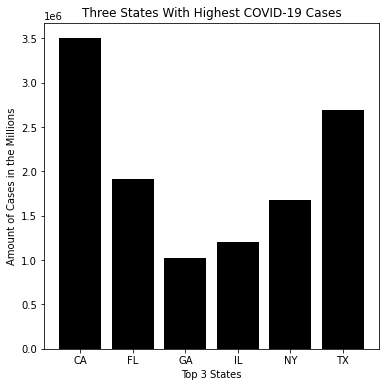

In [69]:
plt.figure(figsize=(6, 6))
plt.bar(df_hi_states['state'], df_hi_states['positive'], color='black')
plt.title('Three States With Highest COVID-19 Cases') # California is the first followed by Texas and Florida
plt.xlabel('Top 3 States')
plt.ylabel('Amount of Cases in the Millions')

In [70]:
#Ploting states using the column positive increase
def plot_states(var='positiveIncrease',
             state='CA'):
    """
    Plots a bar chart of the data
    """
    assert type(var)==str, "Need to convert to string for the variable name"
    assert type(state)==str, "Need to convert to string for the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(10,4))
    plt.title("Graph of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='red')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=50)
    plt.yticks(fontsize=14)
    plt.show()

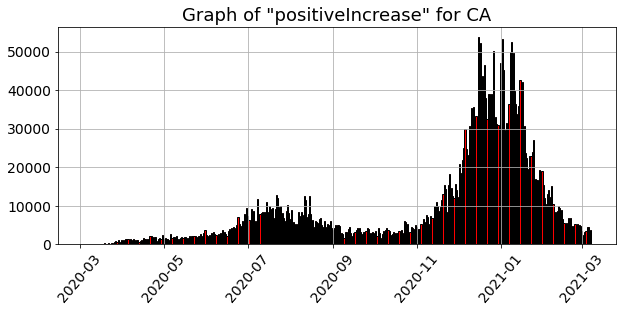

In [71]:
plot_states() # This the graph of California 

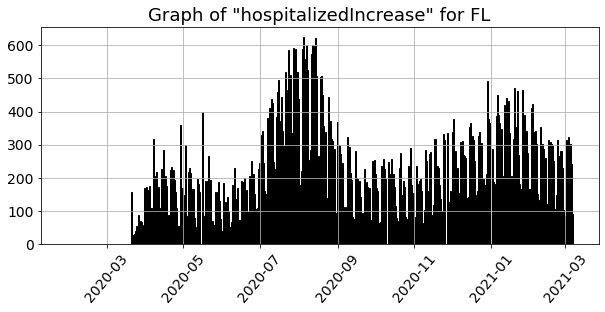

In [72]:
plot_states('hospitalizedIncrease','FL') # We can plot any states and check the increase or decrease in cases

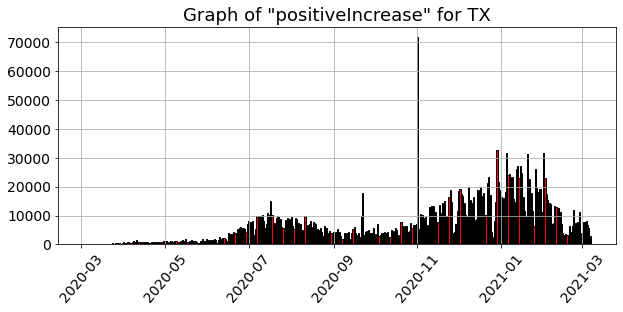

In [73]:
plot_states(state = 'TX')

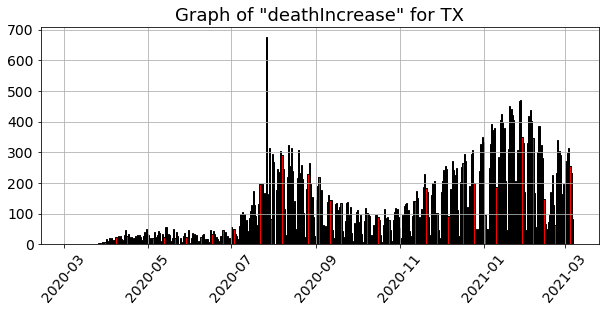

In [74]:
plot_states('deathIncrease','TX')

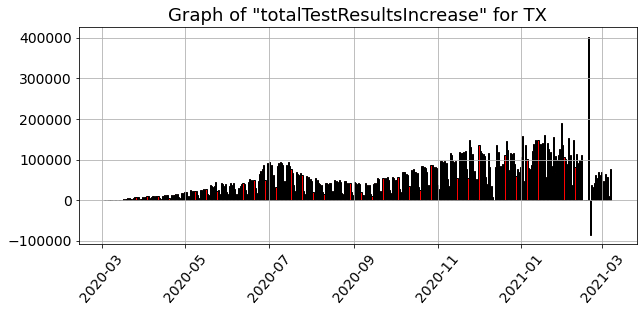

In [75]:

plot_states('totalTestResultsIncrease','TX')

In [78]:
#Plotting the total test increase against the positive increase

def plot_ab(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart 
    """
    assert type(varx)==str
    assert type(vary)==str
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='blue',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Data is not available for the scatter plot")

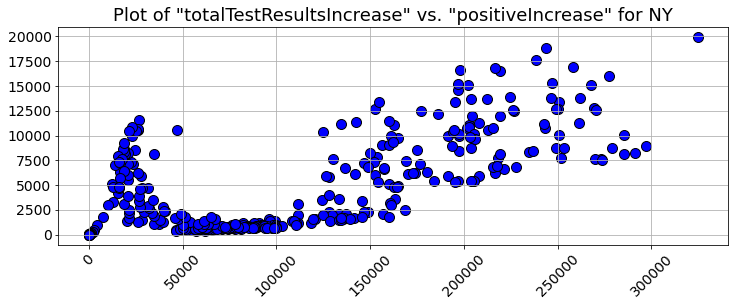

In [79]:
plot_ab(state='NY')

In [80]:
plot_ab('hospitalized','death','NY')

Data is not available for the scatter plot


In [81]:
#Plotting the number of tests mentioned of each state
def Testing(lst_states=['NY','CA','MA','TX','FL']):
    """
    Plots the average testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()


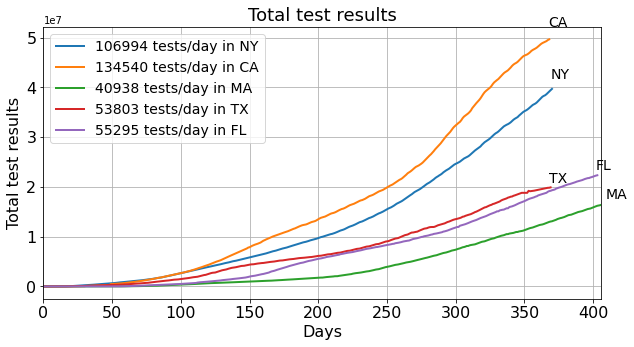

In [82]:
Testing()

In [83]:
# Will be used for plotting fatality ratio

def fatality(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [32]:
# Will be used for plotting positive ratio
def positiveTest(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [33]:
# Will be used for plotting recovery ratio
def recovery(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1


In [34]:
# Will be used for plotting Hospitalization ratio
def hospitalization(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

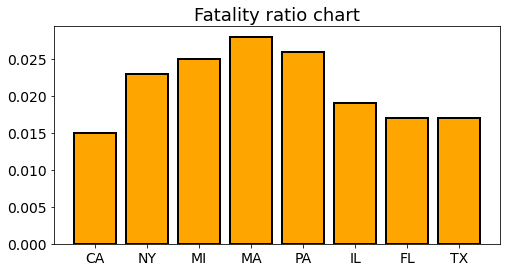

In [35]:
states = ['CA','NY','MI','MA','PA','IL', 'FL', 'TX']
fr,x = [],[]
for s in states:
    data = fatality(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='orange',
        edgecolor='k',linewidth=2)
plt.show()

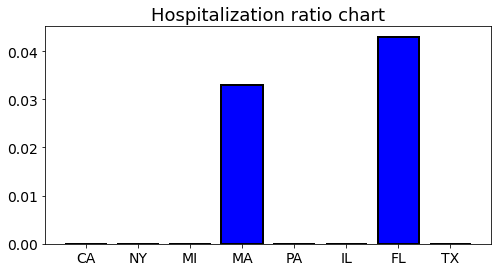

In [36]:
states = ['CA','NY','MI','MA','PA','IL', 'FL','TX']
hos,x = [],[]
for s in states:
    data = hospitalization(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

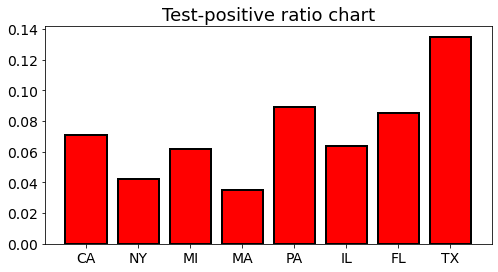

In [37]:
states = ['CA','NY','MI','MA','PA','IL', 'FL','TX']
tp,x = [],[]
for s in states:
    data = positiveTest(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='red',
        edgecolor='k',linewidth=2)
plt.show()

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


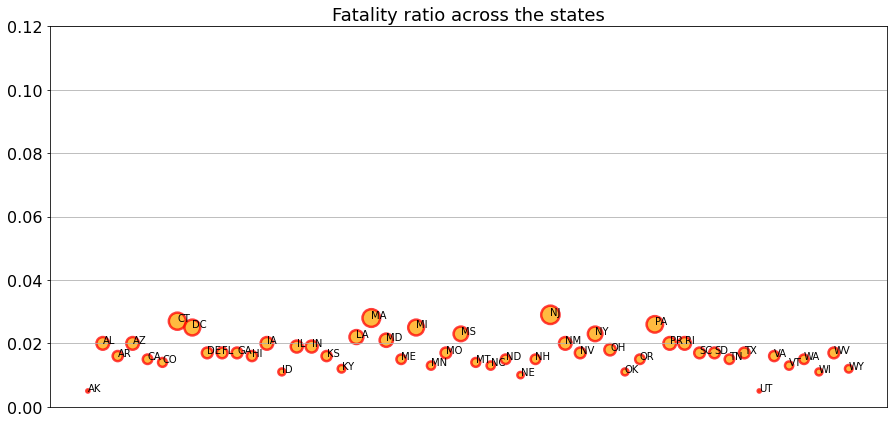

In [38]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',       
    which='both',   
    bottom=False,      
    top=False,  
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


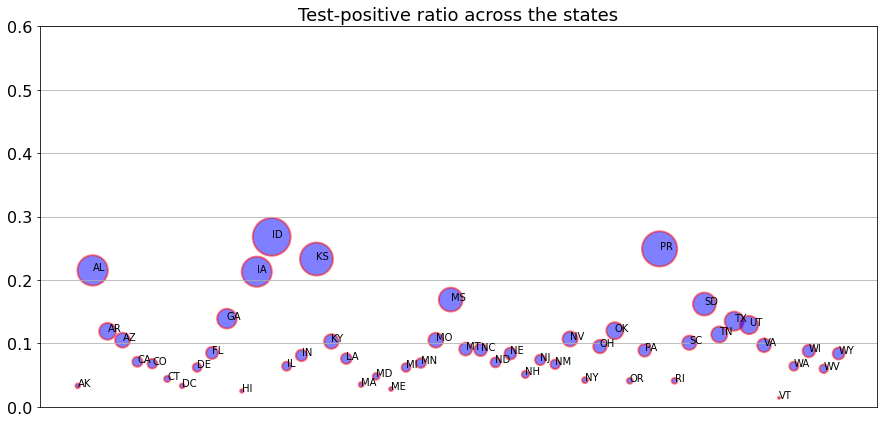

In [39]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [40]:
def caseDecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

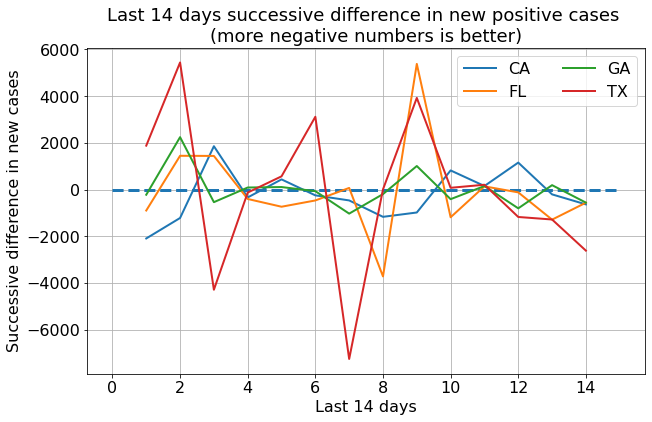

In [41]:
#Plotting the difference to show that number of positive cases 
#have gone down in the given states and to show that the negative numbers are better

states = ['CA','FL','GA','TX']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseDecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

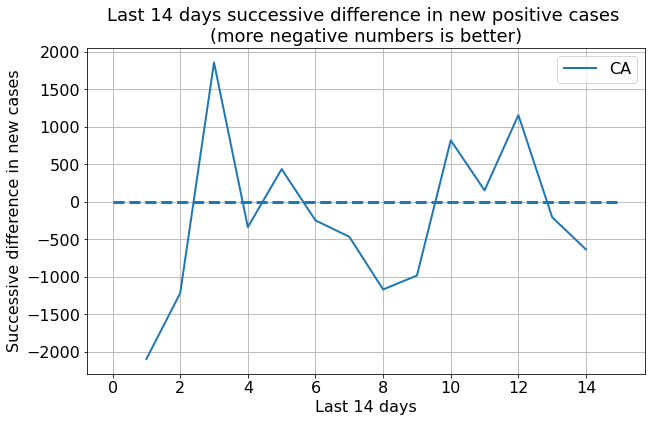

In [42]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseDecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

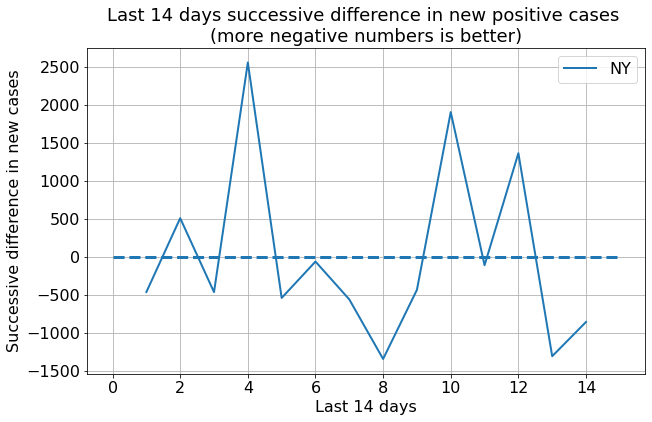

In [43]:

states = ['NY']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseDecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

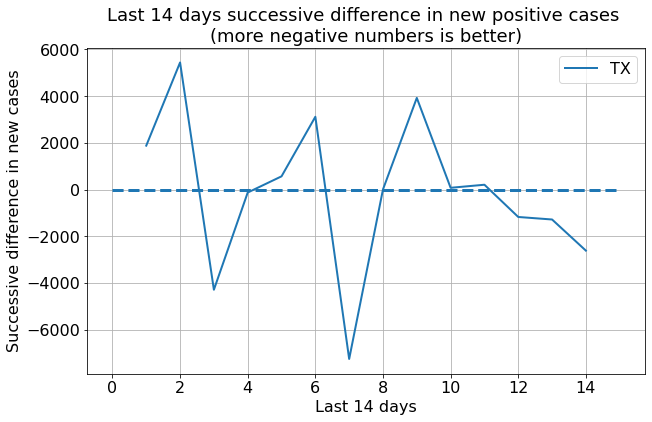

In [44]:
states = ['TX']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseDecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

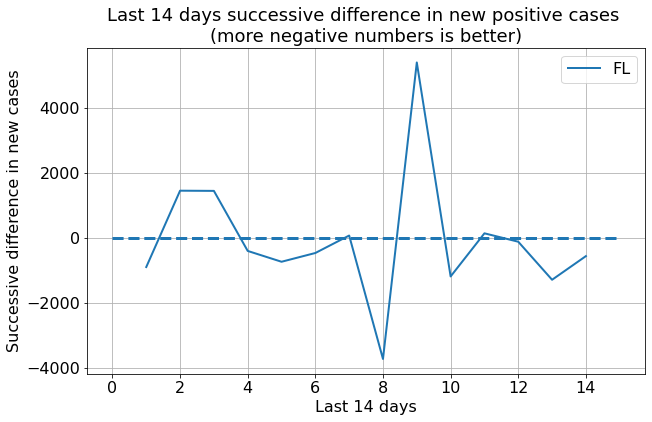

In [141]:
states = ['FL']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

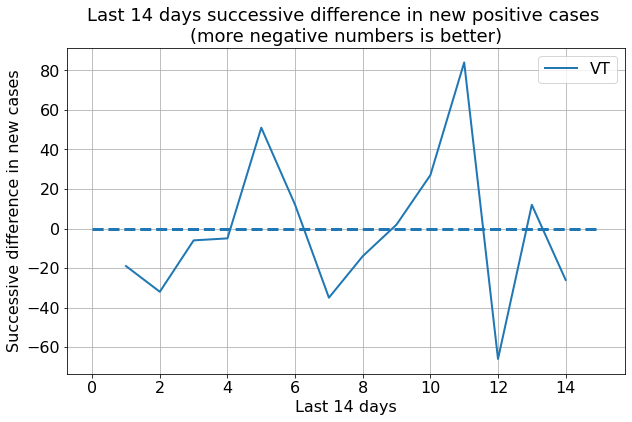

In [45]:
states = ['VT']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseDecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

In [46]:
#Dropped unnecessary columns


df.drop(["state", "date", "posNeg", "total", "hash", "inIcuCurrently", "inIcuCumulative", 
                     "onVentilatorCurrently", "totalTestResultsIncrease", "onVentilatorCumulative", "probableCases","totalTestResultsSource", 
                     "negativeIncrease", "pending"], axis=1, inplace=True)

In [47]:
summary = pd.DataFrame(df.sum()) # Summary of the dataset df

In [48]:
summary

,0
positive,3.400892e+09
negative,1.127280e+10
totalTestResults,4.508128e+10
hospitalizedCurrently,2.064341e+07
hospitalizedCumulative,1.146920e+08
recovered,1.131190e+09
death,7.338598e+07
hospitalized,1.146920e+08
hospitalizedDischarged,1.979848e+08
totalTestsViral,3.345293e+10
